In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv('../data/creditcard.csv')

In [4]:
X = df.drop('Class', axis=1)
y = df['Class']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
model = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)
model.fit(X_scaled)

IsolationForest(contamination=0.001, random_state=42)

In [8]:
y_pred = model.predict(X_scaled)

# Isolation Forest outputs:
#   -1 = anomaly (fraud)
#    1 = normal
# We need to map to 0 and 1 like actual labels
y_pred = np.where(y_pred == -1, 1, 0)

In [9]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.29      0.17      0.21       492

    accuracy                           1.00    284807
   macro avg       0.64      0.58      0.61    284807
weighted avg       1.00      1.00      1.00    284807



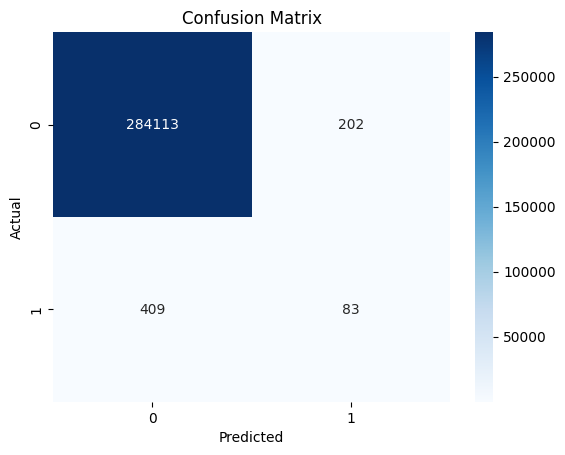

In [10]:
conf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
import joblib
joblib.dump(model, '../models/isolation_forest_model.pkl')
joblib.dump(scaler, '../models/scaler.pkl')

['../models/scaler.pkl']